In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [71]:
la=LabelEncoder()
le=LabelEncoder()
lm=LabelEncoder()
df.region=la.fit_transform(df.region)
df.sex=le.fit_transform(df.sex)
df.smoker=lm.fit_transform(df.smoker)
df


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,1,30.970,3,0,1,10600.54830
1334,1334,18,0,31.920,0,0,0,2205.98080
1335,1335,18,0,36.850,0,0,2,1629.83350
1336,1336,21,0,25.800,0,0,3,2007.94500


In [72]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']
y


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [73]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [74]:
reg.coef_,reg.intercept_

(array([  257.28807486,  -131.11057962,   332.57013224,   479.36939355,
        23820.43412267,  -353.64001656]),
 -11815.452321231387)

In [75]:
example_data = pd.DataFrame({
    'age': [19],
    'sex': [0],
    'bmi': [27.900],
    'children': [0],
    'smoker': [1],
    'region': [3]
})
prediction = reg.predict(example_data)
print("Prediction:", prediction)

Prediction: [25111.24186363]


In [145]:
# with standardization
scaler=StandardScaler()
X_stan=scaler.fit_transform(X)
X_stan
#y_re = y.values.reshape(-1, 1)
#y_stan=scaler.fit_transform(y_re)

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [151]:
reg1=LinearRegression()
reg1.fit(X_stan,y)

LinearRegression()

In [152]:
reg1.intercept_,reg1.coef_

(13270.422265141258,
 array([3613.53615057,  -65.55170114, 2027.3168105 ,  577.66033542,
        9612.57306988, -390.58548034]))

In [150]:
example_data = pd.DataFrame({
    'age': [28],
    'sex': [1],
    'bmi': [33.000],
    'children': [1],
    'smoker': [0],
    'region': [2]
})

example_data = scaler.transform(example_data)
prediction = reg1.predict(example_data)
print("Prediction:", prediction)

Prediction: [6004.4069196]


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_stan, y, test_size=0.75, random_state=23)
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [116]:
lr.intercept_,lr.coef_

(13081.2882436655,
 array([3069.75027948,  236.40947181, 2721.19170736,  547.43282897,
        9655.66645932, -655.86816717]))

In [117]:
y_pred = lr.predict(X_test)


In [118]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

MSE: 37212337.72


In [128]:
lr.score(X_test,y_test)

0.7467544817123992

In [127]:
example_data = pd.DataFrame({
    'age': [18],
    'sex': [0],
    'bmi': [36.850],
    'children': [0],
    'smoker': [0],
    'region': [2]
})
prediction = lr.predict(example_data)
print("Prediction:", prediction)

Prediction: [167300.97135627]


c:\Users\sweth\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


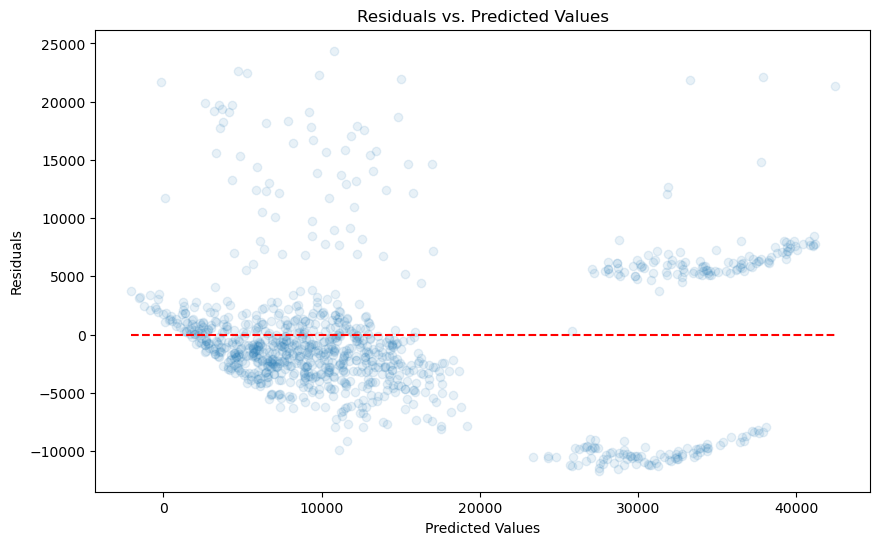

In [114]:
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.1)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [129]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [130]:
forest.score(X_test,y_test)

0.8131791020222543

In [131]:
y_pre=forest.predict(X_test)

In [133]:
example_data = pd.DataFrame({
    'age': [61],
    'sex': [0],
    'bmi': [29.070],
    'children': [0],
    'smoker': [1],
    'region': [1]
})
pred = forest.predict(example_data)
print("Prediction:", pred)

Prediction: [50165.4429074]


c:\Users\sweth\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
